In [57]:
import numpy as np 
import pandas as pd

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import os
for dir, _, files in os.walk('/content/data'):
    for file in files:
        print(os.path.join(dir, file))

/content/data/train.tsv.zip
/content/data/test.tsv.zip


In [60]:
pip install Unidecode

In [61]:
import matplotlib.pyplot as plt
import tensorflow as tf
import unidecode
import nltk

from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from gensim.parsing.preprocessing import remove_stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud


In [62]:
#read dataset
trainset = pd.read_csv("/content/data/train.tsv.zip",sep = '\t')
testset= pd.read_csv("/content/data/test.tsv.zip",sep = '\t')

trainset.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [63]:
print(len(trainset))
print(len(trainset))

156060
156060


In [64]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [65]:
trainset.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [66]:
trainset.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [67]:
targetCategory = trainset['Sentiment'].unique()
targetCategory=list(map(str,targetCategory))
print(targetCategory)

['1', '2', '3', '4', '0']


In [68]:
trainset = trainset[['Phrase','Sentiment']]
trainset.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


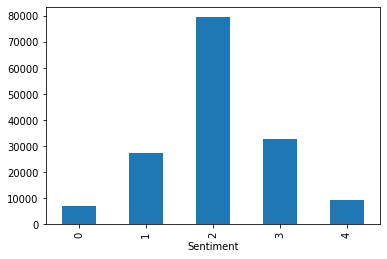

In [69]:
trainset.groupby("Sentiment").Sentiment.count().plot.bar(ylim=0)

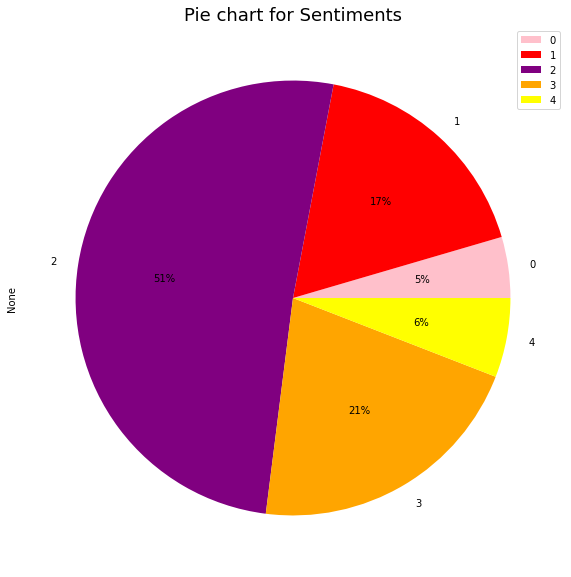

In [70]:
categories = trainset.groupby('Sentiment').size()

categories.plot(kind='pie', subplots=True, figsize=(12,10), autopct = "%.f%%", colors=['pink','red','purple','orange','yellow'])
plt.title("PieChart for Sentiments",fontsize=18)
plt.legend()
plt.show()

In [71]:
phrase = trainset['Phrase']
phrase.head(20)

0     A series of escapades demonstrating the adage ...
1     A series of escapades demonstrating the adage ...
2                                              A series
3                                                     A
4                                                series
5     of escapades demonstrating the adage that what...
6                                                    of
7     escapades demonstrating the adage that what is...
8                                             escapades
9     demonstrating the adage that what is good for ...
10                              demonstrating the adage
11                                        demonstrating
12                                            the adage
13                                                  the
14                                                adage
15                      that what is good for the goose
16                                                 that
17                           what is good for th

In [72]:
sentiment = trainset["Sentiment"]
sentiment.head(15)

0     1
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
Name: Sentiment, dtype: int64

In [82]:
def preprocessDataset(txt): 
        
    txt = str(txt)
    
    #remove single quotes 
    txt = txt.replace("'", "")
    
    
    #word tokenization using text-to-word-sequence
    tokenized_train_set = text_to_word_sequence(txt,filters='!"#%$&()+*,-./;:<=>?@[\\]^`_{|}~\t\n',split=" ")


    #stop word removal
    stopwords = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stopwords]
    #join words into sentence
    stopwordremovetext = ' '.join(stopwordremove)
        

    numberremovetext = ''.join(c for c in stopwordremovetext if not c.isdigit())
    #print(output)
        
    #Stemming
    stemmer= PorterStemmer()

    steminput=nltk.word_tokenize(numberremove_text)
    stemtext=' '.join([stemmer.stem(word) for word in steminput])

    lemmatizer = WordNetLemmatizer()

    def get_wordnetpos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    leminput = nltk.word_tokenize(stemtext)
    lemtext= ' '.join([lemmatizer.lemmatize(w, get_wordnetpos(w)) for w in leminput])
    #print(lem_text)
    

    return lemtext


In [86]:
def wordCollect(phrase, sentiment):
    w = []
    for i in phrase[phrase['Sentiment'] == sentiment]['Phrase'].str.split():
        for j in i:
            w.append(j)
    return w

In [87]:
negative = wordCollect(trainset,0)
somewhatNegative = wordCollect(trainset,1)
neutral = wordCollect(trainset,2)
somewhatPositive = wordCollect(trainset,3)
positive = wordCollect(trainset,4)

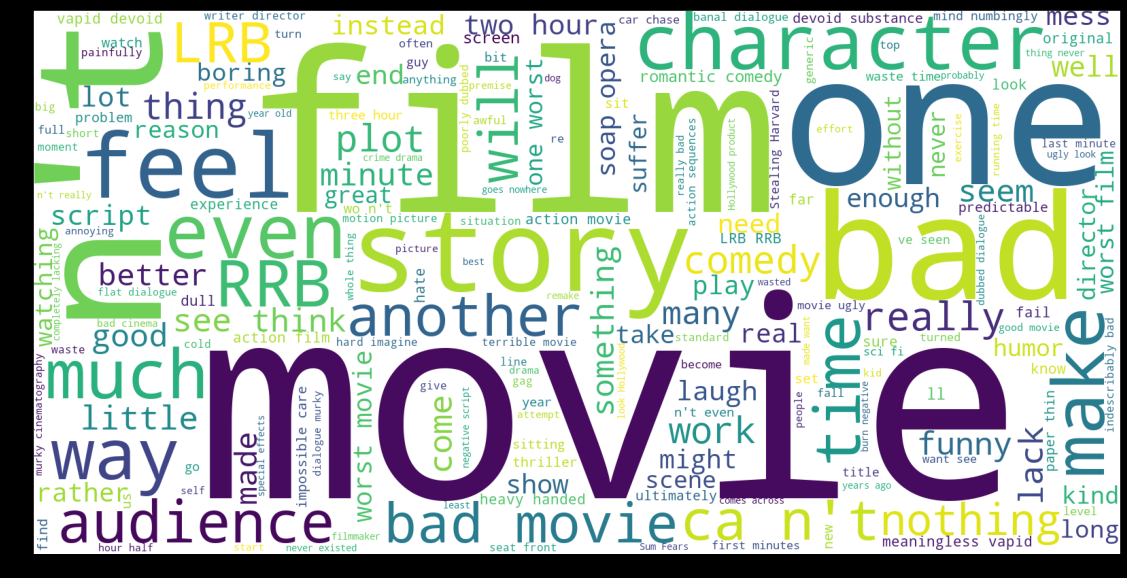

In [88]:
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(negative))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)

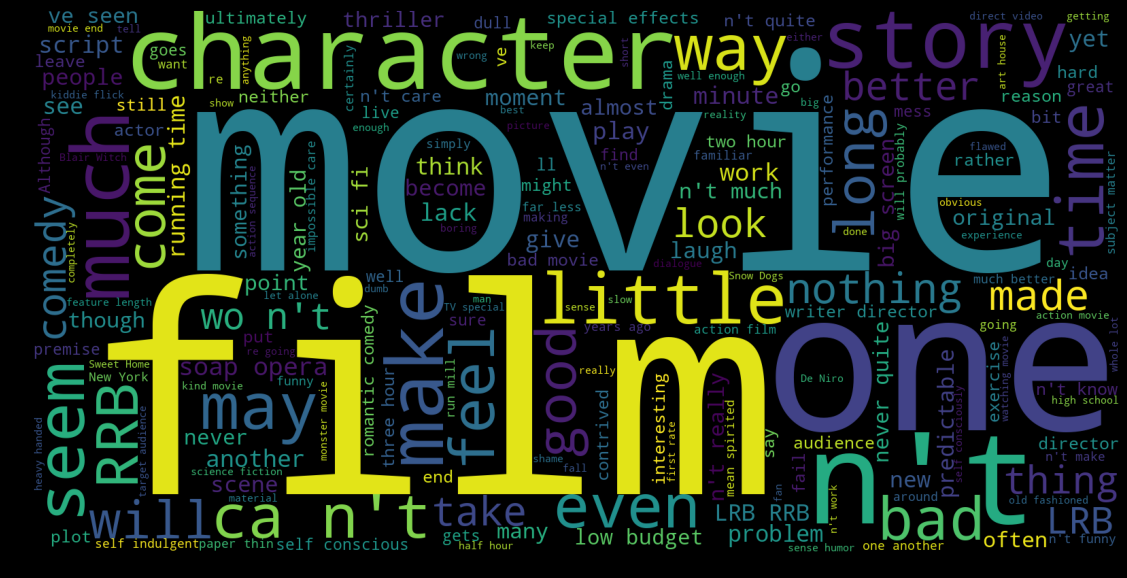

In [89]:
wordCloud = WordCloud(background_color="black", width=1600, height=800).generate(' '.join(somewhatNegative))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)

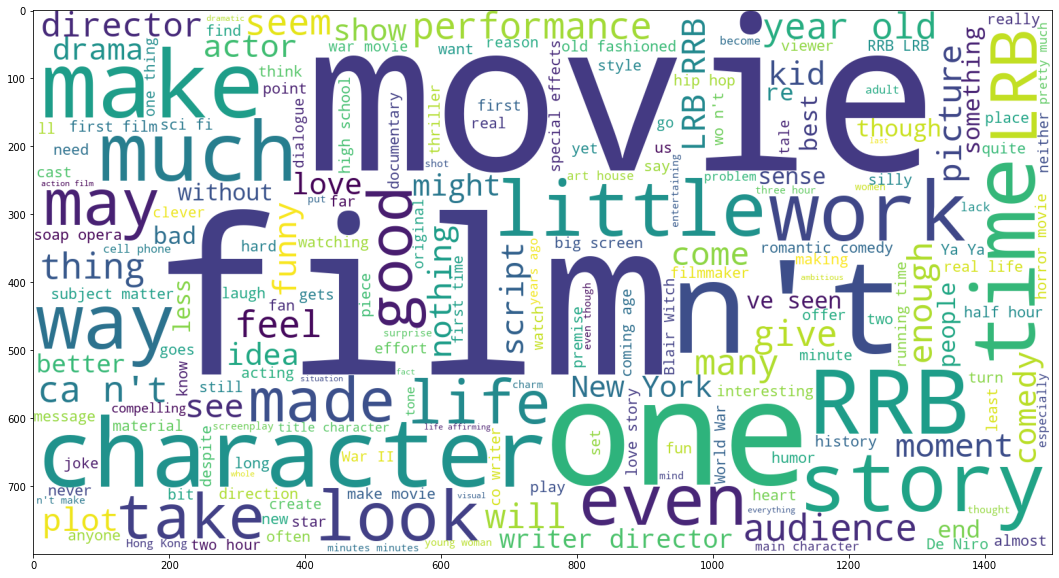

In [90]:
wordCloud = WordCloud(background_color="white", width=1500, height=800).generate(' '.join(neutral))
plt.figure(figsize=(20,10))
plt.imshow(wordCloud)

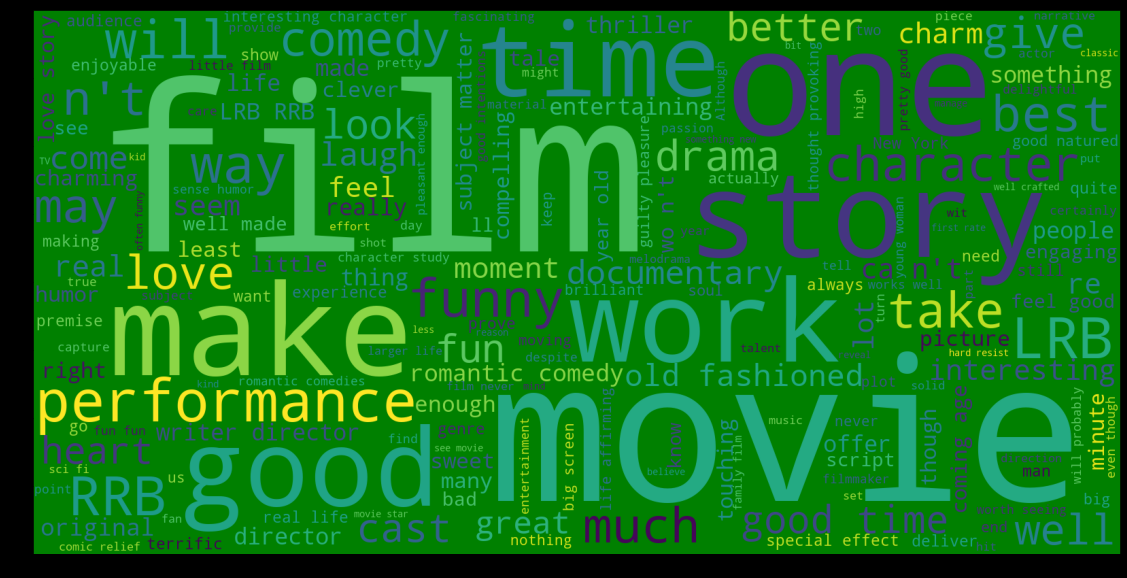

In [91]:
wordCloud = WordCloud(background_color="green", width=1600, height=800).generate(' '.join(somewhatPositive))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)

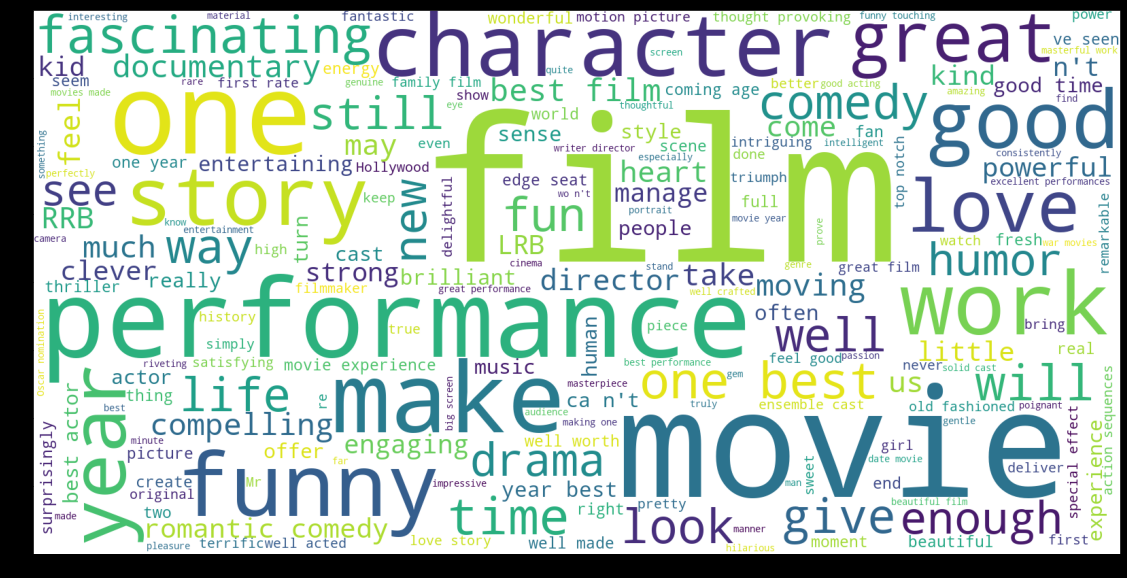

In [92]:
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(positive))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)